In [1]:
#pip install google-play-scraper pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
from google_play_scraper import Sort, reviews

# ChatGPT ( Google Play）
PACKAGE_NAME = "com.openai.chatgpt"

# a little reviews for sturcture
result, continuation_token = reviews(
    PACKAGE_NAME,
    lang="en",          
    country="us",       #
    sort=Sort.NEWEST,   # 
    count=100,          # 100 tips
    filter_score_with=None,  
)

print("Number of reviews fetched:", len(result))
print("Example review:\n", result[0])


Number of reviews fetched: 100
Example review:
 {'reviewId': '449fc39d-ced1-491d-aae6-22c905db871f', 'userName': 'Bowen Cornish', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjXajeswHhg-4QMLrgfE7Y00eqgHOCfiL44Cvi0cqUtjTzGbq7gl', 'content': 'this app makes it almost impossible to delete your account without emails to their support and time waiting on responses, this app is very sly and unhelpful when trying to remove your account', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': None, 'at': datetime.datetime(2025, 12, 6, 22, 30, 53), 'replyContent': None, 'repliedAt': None, 'appVersion': None}


In [3]:
import pandas as pd
from google_play_scraper import Sort, reviews

PACKAGE_NAME = "com.openai.chatgpt"

result, continuation_token = reviews(
    PACKAGE_NAME,
    lang="en",
    country="us",
    sort=Sort.NEWEST,
    count=200,          # more
    filter_score_with=None,
)

# transfer DataFrame
df = pd.DataFrame(result)

print(df.columns)

# choose important part
cols_to_keep = ["content", "score", "at", "appVersion", "userName", "thumbsUpCount"]
df_subset = df[cols_to_keep]

print(df_subset.head())

# download
df_subset.to_csv("chatgpt_google_play_reviews_sample.csv", index=False)
print("Saved to chatgpt_google_play_reviews_sample.csv")


Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')
                                             content  score  \
0  I use it a lot for image creations. now everyt...      5   
1                                             superb      5   
2  this app makes it almost impossible to delete ...      1   
3  ChatGPT is my everything. I have no stress wit...      5   
4                                               good      5   

                   at  appVersion         userName  thumbsUpCount  
0 2025-12-06 22:31:41  1.2025.315       Gary Giles              1  
1 2025-12-06 22:31:30  1.2025.329  Amenyo Clifford              0  
2 2025-12-06 22:30:53        None    Bowen Cornish              0  
3 2025-12-06 22:30:50  1.2025.329     Lefa Makhele              0  
4 2025-12-06 22:30:47        None     Anjan Gumnam              0  
Saved to chatgpt_googl

In [1]:
from google_play_scraper import Sort, reviews
import pandas as pd

PACKAGE_NAME = "com.openai.chatgpt"

def fetch_reviews_batch(package_name, continuation_token=None, batch_size=200):
    """
    Fetch one batch of reviews from Google Play.
    Returns: (reviews_list, new_continuation_token)
    """
    result, new_token = reviews(
        package_name,
        lang="en",            # language
        country="us",         # country
        sort=Sort.NEWEST,     # newest reviews first
        count=batch_size,     # how many to fetch in this batch
        filter_score_with=None,
        continuation_token=continuation_token
    )
    return result, new_token


def fetch_reviews_until_target(package_name, target_count=10000, batch_size=200, max_batches=100):
    """
    Keep fetching batches until we reach target_count
    or run out of continuation token or exceed max_batches.
    """
    all_reviews = []
    token = None

    for i in range(max_batches):
        print(f"Fetching batch {i+1} ...")
        batch, token = fetch_reviews_batch(package_name, token, batch_size)

        if not batch:
            print("No more reviews returned. Stopping.")
            break

        all_reviews.extend(batch)
        print(f"  Batch size: {len(batch)}, total collected: {len(all_reviews)}")

        if len(all_reviews) >= target_count:
            print(f"Reached target of {target_count} reviews. Stopping.")
            break

        if not token:
            print("No continuation token. Reached the end of available reviews.")
            break

    return all_reviews


def save_reviews_to_csv(reviews_list, filename="chatgpt_google_play_reviews_raw.csv"):
    """
    Save raw reviews to CSV using pandas.
    """
    df = pd.DataFrame(reviews_list)
    df.to_csv(filename, index=False)
    print(f"Saved {len(df)} reviews to {filename}")
    return df


if __name__ == "__main__":
    # Step 1: fetch reviews
    reviews_list = fetch_reviews_until_target(
        PACKAGE_NAME,
        target_count=12000,   # 抓多一点，后面去重后也能有 10k+
        batch_size=200,
        max_batches=100
    )

    # Step 2: save raw data to CSV
    df_raw = save_reviews_to_csv(reviews_list, "chatgpt_google_play_reviews_raw.csv")

    # Step 3: select important columns and drop duplicates
    columns_to_keep = ["content", "score", "at", "appVersion", "userName", "thumbsUpCount"]
    existing_cols = [c for c in columns_to_keep if c in df_raw.columns]

    df_clean = df_raw[existing_cols].copy()

    # Drop empty texts and duplicates
    if "content" in df_clean.columns:
        df_clean = df_clean[df_clean["content"].notna() & (df_clean["content"].str.strip() != "")]
        df_clean = df_clean.drop_duplicates(subset=["content"])

    df_clean.to_csv("chatgpt_google_play_reviews_clean.csv", index=False)
    print(f"Cleaned dataset saved with {len(df_clean)} rows to chatgpt_google_play_reviews_clean.csv")


Fetching batch 1 ...
  Batch size: 200, total collected: 200
Fetching batch 2 ...
  Batch size: 200, total collected: 400
Fetching batch 3 ...
  Batch size: 200, total collected: 600
Fetching batch 4 ...
  Batch size: 200, total collected: 800
Fetching batch 5 ...
  Batch size: 200, total collected: 1000
Fetching batch 6 ...
  Batch size: 200, total collected: 1200
Fetching batch 7 ...
  Batch size: 200, total collected: 1400
Fetching batch 8 ...
  Batch size: 200, total collected: 1600
Fetching batch 9 ...
  Batch size: 200, total collected: 1800
Fetching batch 10 ...
  Batch size: 200, total collected: 2000
Fetching batch 11 ...
  Batch size: 200, total collected: 2200
Fetching batch 12 ...
  Batch size: 200, total collected: 2400
Fetching batch 13 ...
  Batch size: 200, total collected: 2600
Fetching batch 14 ...
  Batch size: 200, total collected: 2800
Fetching batch 15 ...
  Batch size: 200, total collected: 3000
Fetching batch 16 ...
  Batch size: 200, total collected: 3200
Fetch

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("chatgpt_google_play_reviews_clean.csv")

print("Number of rows:", len(df))
df.head()


Number of rows: 7375


,content,score,at,appVersion,userName,thumbsUpCount
0,"great platform to steal public data & idea, Ta...",1,2025-12-10 00:40:08,NaN,Ameet Sarker,0
1,"so easy to interact with, love how it explains...",5,2025-12-10 00:39:28,1.2025.336,Burt Keefer,0
2,good,5,2025-12-10 00:39:20,1.2025.308,Vinod Tirkey,0
3,very helpful and amazing so nice and excellent...,5,2025-12-10 00:39:18,1.2025.336,Jhili Ghadia,0
4,very helpful and good,5,2025-12-10 00:38:28,1.2025.329,Nour Alkarkoukli,0


/var/folders/bt/qhw3qr0n7012h7l8864rg4_00000gn/T/ipykernel_34991/1187374138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["score"], palette="Blues")


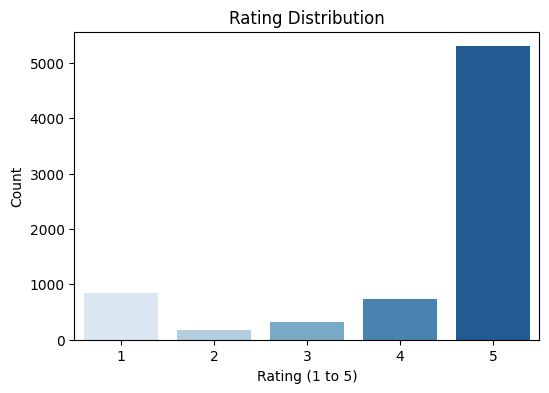

score
1     842
2     179
3     316
4     740
5    5298
Name: count, dtype: int64

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["score"], palette="Blues")
plt.title("Rating Distribution")
plt.xlabel("Rating (1 to 5)")
plt.ylabel("Count")
plt.show()

df["score"].value_counts().sort_index()


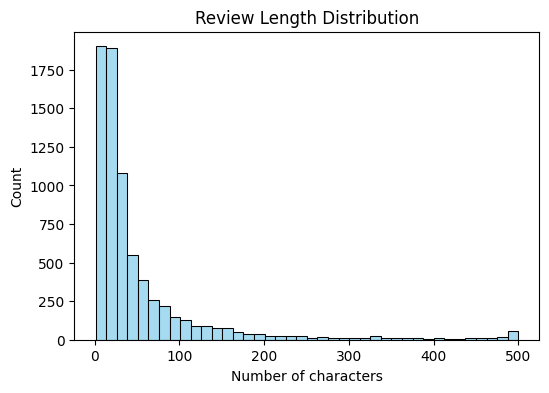

count    7375.00000
mean       52.80678
std        79.86159
min         1.00000
25%        13.00000
50%        25.00000
75%        54.00000
max       500.00000
Name: review_length, dtype: float64

In [4]:
df["review_length"] = df["content"].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df["review_length"], bins=40, color="skyblue")
plt.title("Review Length Distribution")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()

df["review_length"].describe()


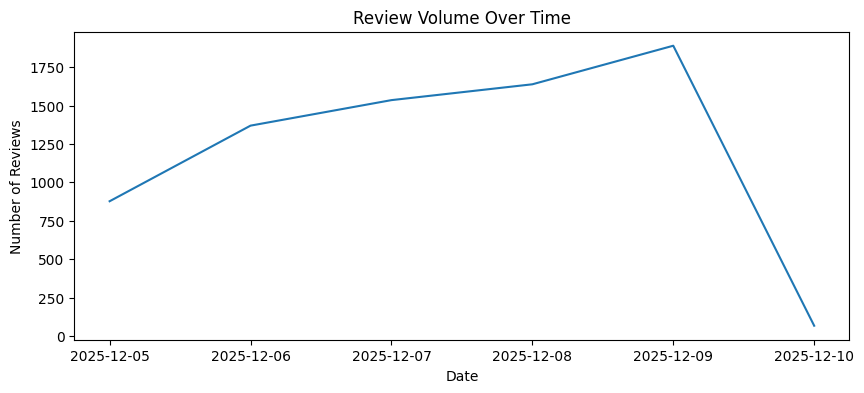

In [5]:
df["at"] = pd.to_datetime(df["at"])

time_series = df.groupby(df["at"].dt.date).size()

plt.figure(figsize=(10,4))
time_series.plot()
plt.title("Review Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.show()


In [6]:
print("Random sample of 10 reviews:")
df["content"].sample(10, random_state=42).values


Random sample of 10 reviews:


array(['I’ve noticed ChatGPT frequently repeats the same errors—so often that it’s sometimes better to write content myself. Today I’m sharing a review with a screenshot as evidence. Instead of improving, ChatGPT seems to make major mistakes in posts and writing, perhaps to push users toward premium plans. This feels like a wrong and frustrating approach.',
       'exceptionally good',
       'very helpful for me and my work, thank you so much chatgpt',
       "I use this app literally everyday for multiple purposes. I use it so much, I decided to sign up for the $20/month plan. It's an extremely useful app and I see it getting better. Keep up the great work with this app!",
       'very. help full', 'personally I love it, it is very helpful',
       'chat gpt is so good execllant app',
       "'Login with Google'not working. it's been 3 days and I'm continuously not able to login to my account. I thought it will be temporary but even after 3 days it loads indefinitely when I click 'Lo

In [7]:
print("Missing values per column:")
print(df.isna().sum())

print("\nDuplicate text count:")
print(df["content"].duplicated().sum())


Missing values per column:
content            0
score              0
at                 0
appVersion       670
userName           0
thumbsUpCount      0
review_length      0
dtype: int64

Duplicate text count:
0


In [8]:
import re
from collections import Counter

def simple_tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z ]", " ", text)
    return text.split()

# Get all tokens from first 5,000 reviews (for speed)
tokens = []
for t in df["content"].head(5000):
    tokens.extend(simple_tokenize(str(t)))

word_counts = Counter(tokens)

print("Most common words:")
word_counts.most_common(20)


Most common words:


[('it', 1961),
 ('app', 1312),
 ('i', 1301),
 ('and', 1232),
 ('is', 1147),
 ('very', 1053),
 ('the', 1052),
 ('to', 983),
 ('good', 948),
 ('this', 853),
 ('for', 753),
 ('a', 697),
 ('s', 594),
 ('best', 500),
 ('you', 497),
 ('my', 470),
 ('in', 420),
 ('but', 407),
 ('so', 400),
 ('me', 395)]

In [9]:
df_summary = pd.DataFrame({
    "num_rows": [len(df)],
    "avg_length": [df["review_length"].mean()],
    "median_length": [df["review_length"].median()],
    "rating_mean": [df["score"].mean()],
    "rating_std": [df["score"].std()],
})

df_summary.to_csv("eda_summary_stats.csv", index=False)
df.head().to_csv("eda_sample_head.csv")

print("Saved summary CSV and sample head file.")


Saved summary CSV and sample head file.
